In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
from torchvision.models.resnet import ResNet
from torchvision.models.resnet import BasicBlock
from torchvision.models.resnet import Bottleneck
from torchvision import models
import segmentation_models_pytorch as smp

from segmentation_models_pytorch.encoders._base import EncoderMixin
import segmentation_models_pytorch.encoders as smp_enc

from torchvision.models.resnet import ResNet
from copy import deepcopy

import torchvision as tv

from layers_2D import RotConv, Vector2Magnitude, VectorBatchNorm, VectorMaxPool, VectorUpsampling

## MNIST

In [4]:
x = torch.randn(8,1,28,28)

### Layer 1

In [5]:
x = RotConv(1, 6, [9, 9], 1, 9 // 2, n_angles=17, mode=1)(x)
print(x[0].shape)
x = VectorMaxPool(2)(x)
print(x[0].shape)
x = VectorBatchNorm(6)(x)
print(x[0].shape)

torch.Size([8, 6, 28, 28])
torch.Size([8, 6, 14, 14])
torch.Size([8, 6, 14, 14])


### Layer 2

In [6]:
x = RotConv(6, 16, [9, 9], 1, 9 // 2, n_angles=17, mode=2)(x)
print(x[0].shape)
x = VectorMaxPool(2)(x)
print(x[0].shape)
x = VectorBatchNorm(16)(x)
print(x[0].shape)

torch.Size([8, 16, 14, 14])
torch.Size([8, 16, 7, 7])
torch.Size([8, 16, 7, 7])


### Layer 3

In [7]:
x = RotConv(16, 32, [9, 9], 1, 1, n_angles=17, mode=2)(x)
print(x[0].shape)

torch.Size([8, 32, 1, 1])


In [8]:
x = Vector2Magnitude()(x)
print(x.shape)

torch.Size([8, 32, 1, 1])


### Layer 4

In [9]:
x = nn.Conv2d(32, 128, 1)(x)  # FC1
print(x.shape)
x = nn.BatchNorm2d(128)(x)
print(x.shape)
x = nn.ReLU()(x)
print(x.shape)

torch.Size([8, 128, 1, 1])
torch.Size([8, 128, 1, 1])
torch.Size([8, 128, 1, 1])


In [10]:
x = nn.Dropout2d(0.7)(x)
print(x.shape)
x = nn.Conv2d(128, 10, 1)(x)  # FC2
print(x.shape)

torch.Size([8, 128, 1, 1])
torch.Size([8, 10, 1, 1])


In [11]:
x.view(x.size()[0], x.size()[1]).shape

torch.Size([8, 10])

## Segmentation example

def __init__(self, in_channels, out_channels, kernel_size, stride=1,
                 padding=0, dilation=1, n_angles = 8, mode=1):

### Layers

In [12]:
x = torch.randn(8,3,256,256)

# Layer 1
x = RotConv(3, 64, [3, 3], 1, 1, n_angles=6, mode=1)(x)
print(x[0].shape)
x = VectorMaxPool(2)(x)
print(x[0].shape)
x = VectorBatchNorm(64)(x)
print(x[0].shape)

# Layer 2
x = RotConv(64, 128, [3, 3], 1, 1, n_angles=6, mode=2)(x)
print(x[0].shape)
x = VectorMaxPool(2)(x)
print(x[0].shape)
x = VectorBatchNorm(128)(x)
print(x[0].shape)

# Layer 3
x = RotConv(128, 256, [3, 3], 1, 1, n_angles=6, mode=2)(x)
print(x[0].shape)
x = VectorMaxPool(2)(x)
print(x[0].shape)
x = VectorBatchNorm(256)(x)
print(x[0].shape)

# Layer 4
x = RotConv(256, 512, [3, 3], 1, 1, n_angles=6, mode=2)(x)
print(x[0].shape)
x = VectorMaxPool(2)(x)
print(x[0].shape)
x = VectorBatchNorm(512)(x)
print(x[0].shape)

# UpSampling Layer
x = VectorUpsampling(size=256)(x)
print(x[0].shape)
x = Vector2Magnitude()(x)
print(x.shape)

torch.Size([8, 64, 256, 256])
torch.Size([8, 64, 128, 128])
torch.Size([8, 64, 128, 128])
torch.Size([8, 128, 128, 128])
torch.Size([8, 128, 64, 64])
torch.Size([8, 128, 64, 64])
torch.Size([8, 256, 64, 64])
torch.Size([8, 256, 32, 32])
torch.Size([8, 256, 32, 32])
torch.Size([8, 512, 32, 32])
torch.Size([8, 512, 16, 16])
torch.Size([8, 512, 16, 16])
torch.Size([8, 512, 256, 256])
torch.Size([8, 512, 256, 256])


In [13]:
x = nn.Conv2d(512, 4096, 1)(x)  # FC1
print(x.shape)
x = nn.BatchNorm2d(4096)(x)
print(x.shape)
x = nn.ReLU()(x)
print(x.shape)

torch.Size([8, 4096, 256, 256])
torch.Size([8, 4096, 256, 256])
torch.Size([8, 4096, 256, 256])


In [14]:
x = nn.Dropout2d(0.7)(x)
print(x.shape)
x = nn.Conv2d(4096, 1, 1)(x)  # FC2
print(x.shape)

torch.Size([8, 4096, 256, 256])
torch.Size([8, 1, 256, 256])


In [16]:
temp = (x[0][0])
temp = temp.detach().cpu()

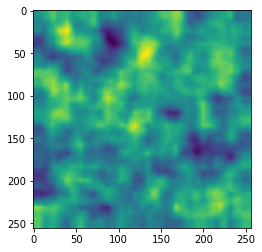

In [18]:
plt.imshow(temp)

In [19]:
temp.shape

torch.Size([256, 256])

# Toy RotEq

In [20]:
# Define network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.main = nn.Sequential(
            
            # Layer 1
            x = RotConv(3, 64, [3, 3], 1, 1, n_angles=6, mode=1)(x)
            x = VectorMaxPool(2)(x)
            x = VectorBatchNorm(64)(x)

            # Layer 2
            x = RotConv(64, 128, [3, 3], 1, 1, n_angles=6, mode=2)(x)
            x = VectorMaxPool(2)(x)
            x = VectorBatchNorm(128)(x)

            # Layer 3
            x = RotConv(128, 256, [3, 3], 1, 1, n_angles=6, mode=2)(x)
            x = VectorMaxPool(2)(x)
            x = VectorBatchNorm(256)(x)

            # Layer 4
            x = RotConv(256, 512, [3, 3], 1, 1, n_angles=6, mode=2)(x)
            x = VectorMaxPool(2)(x)
            x = VectorBatchNorm(512)(x)

            # UpSampling Layer
            x = VectorUpsampling(size=256)(x)
            x = Vector2Magnitude()(x)
            
            # FC1
            x = nn.Conv2d(512, 4096, 1)(x)  
            x = nn.BatchNorm2d(4096)(x)
            x = nn.ReLU()(x)
            
            # FC2
            x = nn.Dropout2d(0.7)(x)
            x = nn.Conv2d(4096, 1, 1)(x)
        )

    def forward(self, x):
        x = self.main(x)
        return x

SyntaxError: invalid syntax (<ipython-input-20-5ceea3d115ee>, line 10)